In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
# 10H 2aB sto6g df
# mean-field energy: -5.2065685284
# E(RCCSD) = -5.392253693111965  E_corr = -0.1856851646652365
# AFQMC energy: -5.3942 +/- 0.0001
ccsd_corr = -0.1856851646652365
afqmc_corr = -5.3942- -5.2065685284
afqmc_err = 0.0001
print(f'df-afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:.6f}')

df-afqmc/ccsd correlation energy: -0.187631 +/- 0.000100


In [2]:
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.171163       0.000025        -0.177911       -0.171430       -0.156133       0.000492        0.713423        0.002617        -1.228187       0.004627        0.499736        0.002439        -0.015029       0.000486        0.935310        0.000390        4.40    6       5.80    7       307.34
  (0.0005, 5e-05)        -0.182511       0.000033        -0.184468       -0.182673       -0.162141       0.000511        1.040851        0.003782        -1.871533       0.006899        0.810313        0.003558        -0.020369       0.000501        0.907974        0.000512        5.20    6       6.40    8       339.33
  (0.0003, 3e-05)        -0.182583       0.000032        -0.184466       -0.182707       -0.161742       0.000497        1.039891        0.003676        -1.873051       0.006714        0.812316        0.003463        -0.020843       0.000487        0.908214        0.000511        5.20    6       6.80    8       344.58
  (0.0001, 1e-05)        -0.184928       0.000047        -0.185563       -0.184731       -0.158725       0.000495        1.515214        0.005374        -2.813597       0.010041        1.272179        0.005088        -0.026204       0.000469        0.879975        0.000562        6.80    8       8.00    9       411.57
  (1e-05, 1e-06)         -0.187392       0.000078        -0.187421       -0.185734       -0.152515       0.000459        2.352918        0.007879        -4.472139       0.015012        2.084344        0.007490        -0.034877       0.000410        0.839815        0.000648        9.20    10      9.60    10      512.28
  (1e-06, 1e-07)         -0.187518       0.000087        -0.187517       -0.185686       -0.149814       0.000460        2.636581        0.009172        -5.032700       0.017538        2.358414        0.008730        -0.037703       0.000399        0.826972        0.000668        10.00   10      10.00   10      548.95
  '''

In [11]:
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07]
lno-ccsd correlation energy: 
 [-0.17143  -0.182673 -0.182707 -0.184731 -0.185734 -0.185686]
lno-ccsd-mp2 correlation energy: 
 [-0.17817801 -0.18463    -0.18459    -0.185366   -0.185763   -0.18568501]
ccsd correlation energy: 
 -0.185685
lno-afqmc/ccsd correlation energy: 
 [-0.171163 -0.182511 -0.182583 -0.184928 -0.187392 -0.187518]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [2.5e-05 3.3e-05 3.2e-05 4.7e-05 7.8e-05 8.7e-05]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.177911 -0.184468 -0.184466 -0.185563 -0.187421 -0.187517]
afqmc/ccsd correlation energy: 
 -0.187631 +/- 0.000100


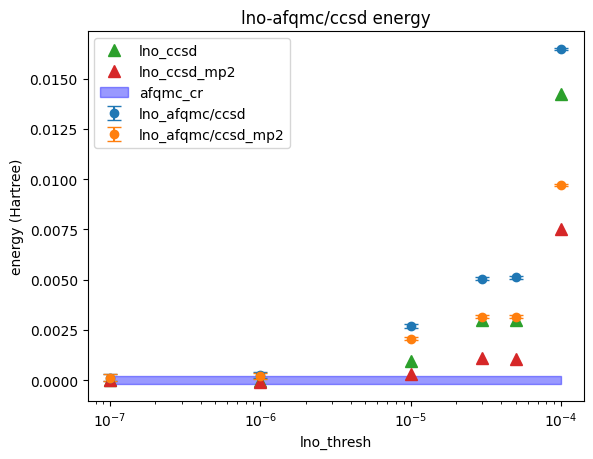

In [12]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

In [ ]:
# full ccsd #
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.170866       0.000041        -0.177614       0.000000        -0.155311       0.000483        0.741459        0.002669        -1.273171       0.004714        0.516156        0.002481        -0.015555       0.000493        0.929833        0.000414        4.40    6       5.80    7       304.21
  (0.0005, 5e-05)        -0.181874       0.000032        -0.183831       0.000000        -0.161275       0.000502        1.045348        0.003764        -1.882704       0.006866        0.816756        0.003536        -0.020598       0.000492        0.903754        0.000533        5.20    6       6.40    8       339.98
  (0.0003, 3e-05)        -0.181969       0.000033        -0.183852       0.000000        -0.160882       0.000497        1.043510        0.003683        -1.882407       0.006719        0.817810        0.003464        -0.021088       0.000488        0.904133        0.000526        5.20    6       6.80    8       349.62
  (0.0001, 1e-05)        -0.184059       0.000050        -0.184694       0.000000        -0.157568       0.000488        1.506200        0.005297        -2.797686       0.009899        1.264996        0.005017        -0.026491       0.000461        0.875606        0.000580        6.80    8       8.00    9       408.67
  (1e-05, 1e-06)         -0.187031       0.000078        -0.187060       0.000000        -0.152194       0.000455        2.346585        0.007840        -4.459606       0.014939        2.078184        0.007453        -0.034837       0.000406        0.838423        0.000652        9.20    10      9.60    10      512.27
  (1e-06, 1e-07)         -0.187519       0.000087        -0.187518       0.000000        -0.149817       0.000460        2.636664        0.009169        -5.032859       0.017532        2.358492        0.008728        -0.037702       0.000399        0.826970        0.000668        10.00           10      10.00   10      549.18
  '''
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07]
lno-ccsd correlation energy: 
 [0. 0. 0. 0. 0. 0.]
lno-ccsd-mp2 correlation energy: 
 [-6.7480057e-03 -1.9569993e-03 -1.8830001e-03 -6.3501298e-04
 -2.8997660e-05  9.9837780e-07]
ccsd correlation energy: 
 -0.185685
lno-afqmc/ccsd correlation energy: 
 [-0.170866 -0.181874 -0.181969 -0.184059 -0.187031 -0.187519]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [4.1e-05 3.2e-05 3.3e-05 5.0e-05 7.8e-05 8.7e-05]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.177614 -0.183831 -0.183852 -0.184694 -0.18706  -0.187518]
afqmc/ccsd correlation energy: 
 -0.187631 +/- 0.000100


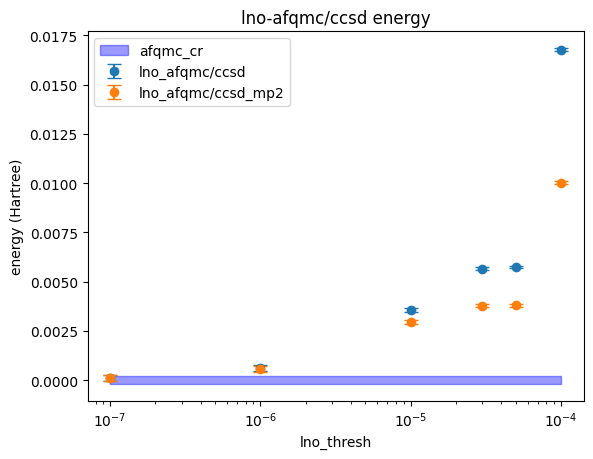

In [14]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
# plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
# plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

In [15]:
# 20H 2aB sto6g df
# converged SCF energy = -10.40582102678
# E(RCCSD) = -10.76994547196589  E_corr = -0.3641244451858829
# AFQMC energy: -10.7754 +/- 0.0003
ccsd_corr = -0.3641244451858829
afqmc_corr = -10.7754- -10.40582102678
afqmc_err = 0.0003
print(f'df-afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:.6f}')

df-afqmc/ccsd correlation energy: -0.369579 +/- 0.000300


In [ ]:
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.341414       0.000042        -0.354394       -0.342242       -0.308257       0.000649        1.799592        0.004440        -3.180092       0.008005        1.347346        0.004120        -0.033156       0.000640        0.916579        0.000467        5.20    6       6.80    8       912.51
  (0.0005, 5e-05)        -0.353084       0.000048        -0.360564       -0.353568       -0.313116       0.000650        2.104476        0.005143        -3.792005       0.009402        1.647562        0.004822        -0.039968       0.000637        0.904143        0.000511        5.60    6       8.00    9       1039.45
  (0.0003, 3e-05)        -0.353385       0.000047        -0.360687       -0.353652       -0.314190       0.000648        2.114741        0.005111        -3.816498       0.009362        1.662563        0.004811        -0.039195       0.000636        0.903763        0.000514        5.60    6       8.40    10      1086.57
  (0.0001, 1e-05)        -0.362217       0.000077        -0.364315       -0.361442       -0.303866       0.000624        3.726311        0.008884        -6.996219       0.016796        3.211558        0.008400        -0.058352       0.000582        0.856054        0.000629        8.40    10      11.00   13      1707.40
  (1e-05, 1e-06)         -0.367331       0.000148        -0.367583       -0.364368       -0.280057       0.000578        6.729985        0.015969        -12.956470      0.030815        6.139208        0.015220        -0.087277       0.000479        0.783049        0.000740        13.20   16      15.80   18      3450.20
  (1e-06, 1e-07)         -0.368913       0.000220        -0.368923       -0.364236       -0.258863       0.000557        9.841116        0.024169        -19.105274      0.046975        9.154106        0.023109        -0.110051       0.000402        0.723528        0.000777        18.00   20      19.00   20      5597.28
  '''
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07]
lno-ccsd correlation energy: 
 [-0.342242 -0.353568 -0.353652 -0.361442 -0.364368 -0.364236]
lno-ccsd-mp2 correlation energy: 
 [-0.355222   -0.36104798 -0.360954   -0.36354    -0.36462    -0.364246  ]
ccsd correlation energy: 
 -0.364124
lno-afqmc/ccsd correlation energy: 
 [-0.341414 -0.353084 -0.353385 -0.362217 -0.367331 -0.368913]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [4.20e-05 4.80e-05 4.70e-05 7.70e-05 1.48e-04 2.20e-04]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.354394 -0.360564 -0.360687 -0.364315 -0.367583 -0.368923]
afqmc/ccsd correlation energy: 
 -0.369579 +/- 0.000300


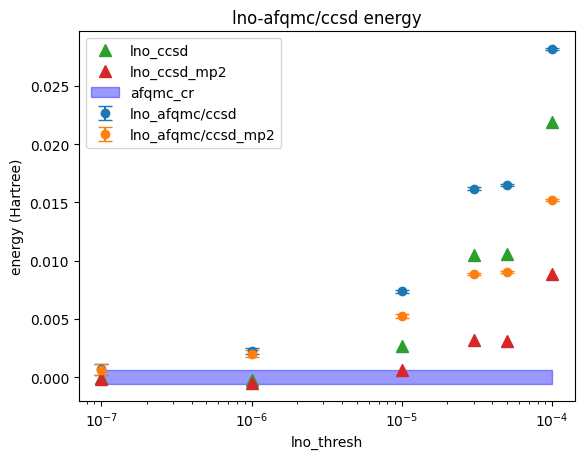

In [17]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()